In [92]:
import pandas as pd 
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
df = pd.read_csv("cleaned_survey.xls")

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_survey.xls'

In [ ]:
df.head()

,Timestamp,Rooms,People,Area(gaz),Floors,Units(September),Units(August),TotalUnits,Peak Time(Hours),Air Conditioner (Inverter),...,Iron,Microwave Oven,Electric Oven,Electric Stove,Water heater/Electric Geyser,Desktop Computer,Gaming Consoles/Laptops,Electric Kettle,Light sources,Fans
0,10/13/2023 16:19:59,5,5,200,1,382,494,876,16,2,...,1,1,0,0,0,0,3,0,48,13
1,10/13/2023 16:29:25,5,5,140,1,169,207,376,2,1,...,0,0,0,0,0,0,2,0,7,5
2,10/13/2023 16:29:36,8,10,1000,1,600,600,1200,4,0,...,2,2,2,2,2,5,6,4,23,20
3,10/13/2023 16:33:38,5,3,150,1,467,679,1146,6,1,...,1,1,1,1,1,0,2,0,14,5
4,10/13/2023 16:42:45,4,4,200,1,800,850,1650,2,0,...,1,1,0,0,1,1,1,0,9,7


In [ ]:
df = df.drop(['Units(September)', 'Units(August)', 'Timestamp'], axis=1)

df.head()

,Rooms,People,Area(gaz),Floors,TotalUnits,Peak Time(Hours),Air Conditioner (Inverter),Air Conditioner (non-Inverter),Refrigerator,Deep Freezer,...,Iron,Microwave Oven,Electric Oven,Electric Stove,Water heater/Electric Geyser,Desktop Computer,Gaming Consoles/Laptops,Electric Kettle,Light sources,Fans
0,5,5,200,1,876,16,2,0,1,0,...,1,1,0,0,0,0,3,0,48,13
1,5,5,140,1,376,2,1,0,1,0,...,0,0,0,0,0,0,2,0,7,5
2,8,10,1000,1,1200,4,0,0,2,2,...,2,2,2,2,2,5,6,4,23,20
3,5,3,150,1,1146,6,1,1,1,0,...,1,1,1,1,1,0,2,0,14,5
4,4,4,200,1,1650,2,0,2,1,0,...,1,1,0,0,1,1,1,0,9,7


In [ ]:
z_scores = stats.zscore(df['TotalUnits'])
threshold = 1.68
df = df[(z_scores < threshold)]

In [ ]:
X = df.drop(['TotalUnits'],axis=1)
Y = df['TotalUnits']
Y

0      876
1      376
2     1200
3     1146
4     1650
      ... 
72     815
73     815
74     530
75    1040
76     800
Name: TotalUnits, Length: 74, dtype: int64

In [ ]:
X = sm.add_constant(X)
X

,const,Rooms,People,Area(gaz),Floors,Peak Time(Hours),Air Conditioner (Inverter),Air Conditioner (non-Inverter),Refrigerator,Deep Freezer,...,Iron,Microwave Oven,Electric Oven,Electric Stove,Water heater/Electric Geyser,Desktop Computer,Gaming Consoles/Laptops,Electric Kettle,Light sources,Fans
0,1.0,5,5,200,1,16,2,0,1,0,...,1,1,0,0,0,0,3,0,48,13
1,1.0,5,5,140,1,2,1,0,1,0,...,0,0,0,0,0,0,2,0,7,5
2,1.0,8,10,1000,1,4,0,0,2,2,...,2,2,2,2,2,5,6,4,23,20
3,1.0,5,3,150,1,6,1,1,1,0,...,1,1,1,1,1,0,2,0,14,5
4,1.0,4,4,200,1,2,0,2,1,0,...,1,1,0,0,1,1,1,0,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1.0,22,5,840,2,10,8,1,2,2,...,2,0,1,1,1,3,4,1,32,11
73,1.0,28,7,1361,3,4,7,7,3,1,...,2,2,2,1,5,0,7,1,48,21
74,1.0,6,4,120,2,8,1,0,1,0,...,1,0,0,0,1,1,2,0,13,9
75,1.0,5,5,240,1,6,1,0,1,0,...,1,1,1,0,0,0,3,0,49,8


In [ ]:
modelall = sm.OLS(Y,X).fit()

modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalUnits   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1.581
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0896
Time:                        00:56:48   Log-Likelihood:                -539.96
No. Observations:                  74   AIC:                             1126.
Df Residuals:                      51   BIC:                             1179.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            590.0634    265.643      2.221      0.031      56.763    1123.364
Rooms                             -6.7596     19.177     -0.352      0.726     -45.259      31.740
People                            55.3289     27.938      1.980      0.053      -0.760     111.417
Area(gaz)                         -0.1037      0.081     -1.286      0.204      -0.266       0.058
Floors                          -101.6480     71.746     -1.417      0.163    -245.685      42.389
Peak Time(Hours)                 -11.8814     10.743     -1.106      0.274     -33.449       9.686
Air Conditioner (Inverter)        98.1013     47.019      2.086      0.042       3.706     192.496
Air Conditioner (non-Inverter)    54.4340     53.669      1.014      0.315     -53.311     162.179
Refrigerator                     100.1098    145.750      0.687      0.495    -192.495     392.715
Deep Freezer                     -22.7124    102.210     -0.222      0.825    -227.908     182.484
Water Dispenser                  -37.5734    107.469     -0.350      0.728    -253.326     178.180
Washing Machine                  154.3531    153.257      1.007      0.319    -153.322     462.029
Television                      -113.9179     60.817     -1.873      0.067    -236.014       8.178
Iron                             -96.8609    166.717     -0.581      0.564    -431.559     237.838
Microwave Oven                   114.8945    115.232      0.997      0.323    -116.444     346.233
Electric Oven                     80.0788    117.446      0.682      0.498    -155.704     315.861
Electric Stove                   -67.3480    125.555     -0.536      0.594    -319.411     184.715
Water heater/Electric Geyser    -178.1708     94.137     -1.893      0.064    -367.160      10.818
Desktop Computer                 -24.9351     64.836     -0.385      0.702    -155.098     105.228
Gaming Consoles/Laptops          -66.8499     51.523     -1.297      0.200    -170.286      36.586
Electric Kettle                   94.4076    145.520      0.649      0.519    -197.736     386.551
Light sources                     10.2896      5.302      1.941      0.058      -0.355      20.934
Fans                               4.6491     14.308      0.325      0.747     -24.076      33.375
==============================================================================
Omnibus:                        6.216   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.443
Skew:                           0.618   Prob(JB):                       0.0658
Kurtosis:                       3.485   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume 

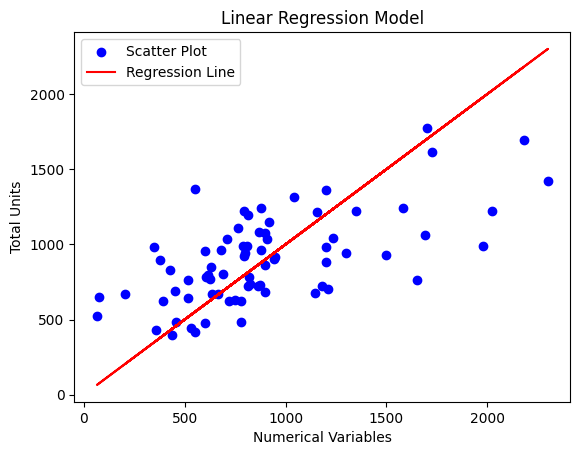

In [ ]:
predicted_values = modelall.predict(X)

plt.scatter(Y, predicted_values, c='b', label="Scatter Plot")
plt.xlabel("Numerical Variables")
plt.ylabel("Total Units")
plt.title("Linear Regression Model")
plt.legend(loc='best')

plt.plot(Y, Y, color='r', label="Regression Line")
plt.legend(loc='best')

plt.show()

In [ ]:
MAD = np.mean(np.abs(Y - predicted_values))

# Calculate the Mean Square Error (MSE)
MSE = mean_squared_error(Y, predicted_values)

# Calculate the Mean Absolute Percentage Error (MAPE)
MAPE = np.mean(np.abs((Y - predicted_values) / Y)) * 100

# Calculate the forecast errors
forecast_errors = Y - predicted_values

# Calculate the Running Sum of Forecast Errors (RSFE)
RSFE = np.cumsum(forecast_errors)

# Calculate the Tracking Signal (TS)
# The Tracking Signal is the RSFE divided by the MAD
tracking_signal = RSFE / MAD

print("Mean Absolute Deviation (MAD):", MAD)
print("Mean Square Error (MSE):", MSE)
print("Mean Absolute Percentage Error (MAPE):", MAPE, "%")


Mean Absolute Deviation (MAD): 276.2013776569212
Mean Square Error (MSE): 127465.802217829
Mean Absolute Percentage Error (MAPE): 53.46213581872667 %


In [ ]:
print("Running Sum of Forecast Errors (RSFE):", RSFE)
print("Tracking Signal (TS):", tracking_signal)

Running Sum of Forecast Errors (RSFE): 0    -8.757747e+01
1    -6.047749e+02
2    -2.883606e+02
3     1.821811e+02
4     1.071354e+03
          ...     
72    2.380797e+02
73    3.279802e+02
74    4.173660e+02
75    1.446924e+02
76    1.471676e-10
Length: 74, dtype: float64
Tracking Signal (TS): 0    -3.170783e-01
1    -2.189616e+00
2    -1.044023e+00
3     6.595951e-01
4     3.878888e+00
          ...     
72    8.619785e-01
73    1.187468e+00
74    1.511093e+00
75    5.238654e-01
76    5.328272e-13
Length: 74, dtype: float64


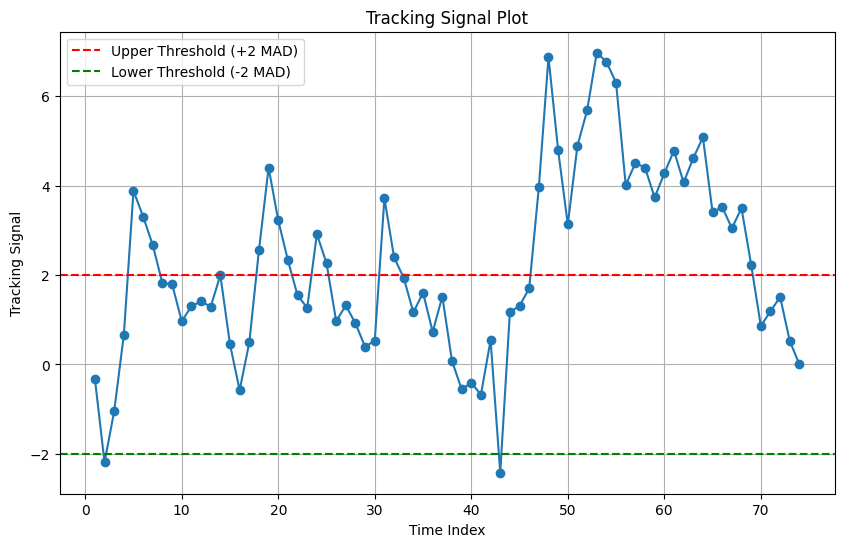

In [ ]:
time_index = range(1, len(tracking_signal) + 1)

plt.figure(figsize=(10, 6))
plt.plot(time_index, tracking_signal, marker='o', linestyle='-')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold (+2 MAD)')
plt.axhline(y=-2, color='g', linestyle='--', label='Lower Threshold (-2 MAD)')
plt.xlabel('Time Index')
plt.ylabel('Tracking Signal')
plt.title('Tracking Signal Plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import pickle

# save the model to disk
model_filename = 'model.sav'
pickle.dump(modelall, open(model_filename, 'wb'))


In [ ]:
df2 = pd.read_csv("cleaned_survey.csv")

In [ ]:
df2.head()

,Timestamp,Rooms,People,Area(gaz),Floors,Units(September),Units(August),TotalUnits,Peak Time(Hours),Air Conditioner (Inverter),...,Iron,Microwave Oven,Electric Oven,Electric Stove,Water heater/Electric Geyser,Desktop Computer,Gaming Consoles/Laptops,Electric Kettle,Light sources,Fans
0,10/13/2023 16:19:59,5,5,200,1,382,494,876,16,2,...,1,1,0,0,0,0,3,0,48,13
1,10/13/2023 16:29:25,5,5,140,1,169,207,376,2,1,...,0,0,0,0,0,0,2,0,7,5
2,10/13/2023 16:29:36,8,10,1000,1,600,600,1200,4,0,...,2,2,2,2,2,5,6,4,23,20
3,10/13/2023 16:33:38,5,3,150,1,467,679,1146,6,1,...,1,1,1,1,1,0,2,0,14,5
4,10/13/2023 16:42:45,4,4,200,1,800,850,1650,2,0,...,1,1,0,0,1,1,1,0,9,7


In [94]:
X = df2.drop(['TotalUnits'],axis=1)
Y = df2['TotalUnits']
X

,Timestamp,Rooms,People,Area(gaz),Floors,Units(September),Units(August),Peak Time(Hours),Air Conditioner (Inverter),Air Conditioner (non-Inverter),...,Iron,Microwave Oven,Electric Oven,Electric Stove,Water heater/Electric Geyser,Desktop Computer,Gaming Consoles/Laptops,Electric Kettle,Light sources,Fans
0,10/13/2023 16:19:59,5,5,200,1,382,494,16,2,0,...,1,1,0,0,0,0,3,0,48,13
1,10/13/2023 16:29:25,5,5,140,1,169,207,2,1,0,...,0,0,0,0,0,0,2,0,7,5
2,10/13/2023 16:29:36,8,10,1000,1,600,600,4,0,0,...,2,2,2,2,2,5,6,4,23,20
3,10/13/2023 16:33:38,5,3,150,1,467,679,6,1,1,...,1,1,1,1,1,0,2,0,14,5
4,10/13/2023 16:42:45,4,4,200,1,800,850,2,0,2,...,1,1,0,0,1,1,1,0,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,10/21/2023 13:25:37,22,5,840,2,373,442,10,8,1,...,2,0,1,1,1,3,4,1,32,11
73,10/21/2023 14:20:30,28,7,1361,3,421,394,4,7,7,...,2,2,2,1,5,0,7,1,48,21
74,10/21/2023 14:30:48,6,4,120,2,250,280,8,1,0,...,1,0,0,0,1,1,2,0,13,9
75,10/21/2023 14:55:19,5,5,240,1,530,510,6,1,0,...,1,1,1,0,0,0,3,0,49,8


In [96]:
loaded_model = pickle.load(open(model_filename, 'rb'))
result = loaded_model.predict(X)
X

ValueError: shapes (77,25) and (23,) not aligned: 25 (dim 1) != 23 (dim 0)

In [29]:
X = sm.add_constant(X)
X

,const,Timestamp,Rooms,People,Area(gaz),Floors,Units(September),Units(August),Peak Time(Hours),Air Conditioner (Inverter),...,Iron,Microwave Oven,Electric Oven,Electric Stove,Water heater/Electric Geyser,Desktop Computer,Gaming Consoles/Laptops,Electric Kettle,Light sources,Fans
0,1.0,10/13/2023 16:19:59,5,5,200,1,382,494,16,2,...,1,1,0,0,0,0,3,0,48,13
1,1.0,10/13/2023 16:29:25,5,5,140,1,169,207,2,1,...,0,0,0,0,0,0,2,0,7,5
2,1.0,10/13/2023 16:29:36,8,10,1000,1,600,600,4,0,...,2,2,2,2,2,5,6,4,23,20
3,1.0,10/13/2023 16:33:38,5,3,150,1,467,679,6,1,...,1,1,1,1,1,0,2,0,14,5
4,1.0,10/13/2023 16:42:45,4,4,200,1,800,850,2,0,...,1,1,0,0,1,1,1,0,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1.0,10/21/2023 13:25:37,22,5,840,2,373,442,10,8,...,2,0,1,1,1,3,4,1,32,11
73,1.0,10/21/2023 14:20:30,28,7,1361,3,421,394,4,7,...,2,2,2,1,5,0,7,1,48,21
74,1.0,10/21/2023 14:30:48,6,4,120,2,250,280,8,1,...,1,0,0,0,1,1,2,0,13,9
75,1.0,10/21/2023 14:55:19,5,5,240,1,530,510,6,1,...,1,1,1,0,0,0,3,0,49,8
